In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cell_df = pd.read_csv(r"D:\downloads dump\featureVectorsMethod3.csv")
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['target'].value_counts()

target
0    16
1     8
Name: count, dtype: int64

<Axes: xlabel='Mean forehead', ylabel='Mean nose'>

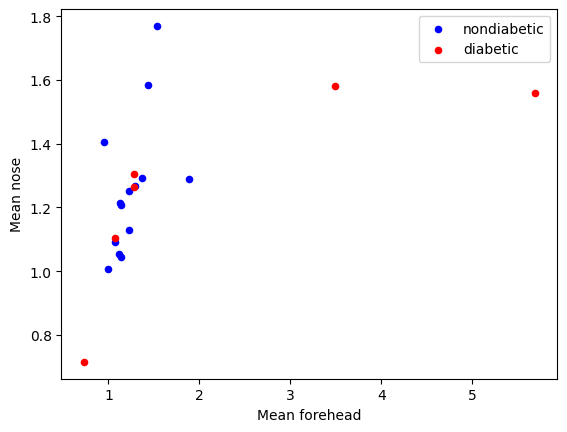

In [4]:
nondiabetic_df = cell_df[cell_df['target']==0][2:25]
diabetic_df = cell_df[cell_df['target']==1][2:25]

axes = nondiabetic_df.plot(kind='scatter', x='Mean forehead', y='Mean nose', color='blue', label='nondiabetic')

diabetic_df.plot(kind='scatter', x='Mean forehead', y='Mean nose', color='red', label='diabetic', ax=axes)
#help(nondiabetic_df.plot)

In [5]:
cell_df.dtypes

cell_df=cell_df[pd.to_numeric(cell_df['Mean forehead'], errors='coerce').notnull()]
cell_df['Mean forehead']=cell_df['Mean forehead'].astype('int')
cell_df=cell_df[pd.to_numeric(cell_df['Mean nose'], errors='coerce').notnull()]
cell_df['Mean nose']=cell_df['Mean nose'].astype('int')
cell_df=cell_df[pd.to_numeric(cell_df['Mean left cheek'], errors='coerce').notnull()]
cell_df['Mean left cheek']=cell_df['Mean left cheek'].astype('int')
cell_df=cell_df[pd.to_numeric(cell_df['Mean right cheek'], errors='coerce').notnull()]
cell_df['Mean right cheek']=cell_df['Mean right cheek'].astype('int')
cell_df.dtypes

Unnamed: 0           int64
Mean forehead        int32
Mean nose            int32
Mean left cheek      int32
Mean right cheek     int32
target               int64
Target name         object
dtype: object

In [6]:
cell_df.columns

feature_df=cell_df[['Mean forehead', 'Mean left cheek', 'Mean nose', 'Mean right cheek']]

x = np.asarray(feature_df)
y = np.asarray(cell_df['target'])

x[0:5]

array([[1, 0, 0, 1],
       [1, 1, 1, 0],
       [1, 1, 1, 1],
       [5, 2, 1, 1],
       [1, 1, 1, 1]])

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.2, random_state = 4)

#19 x 4
x_train.shape

#19 x 1
y_train.shape

#5 x 4
x_test.shape

#5 x 1
y_test.shape

(5,)

In [8]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=1)
classifier.fit(x_train, y_train)

y_predict=classifier.predict(x_test)

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [12]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(classifier, file)